# CHAT BOT

In [ ]:
!pip install langchain langchain_core langchain_groq langchain_community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.7 MB/s eta 0:00:00


In [ ]:
!pip install python-dotenv langchain[groq]

In [ ]:
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

In [ ]:
from langchain_groq import ChatGroq
from google.colab import userdata

llm = ChatGroq(temperature=0, model_name="llama3-8b-8192", api_key=userdata.get('GROQ_API_KEY'))

In [ ]:
response = llm.invoke("who is pm of india")
response.content

"As of my knowledge cutoff, the current Prime Minister of India is Narendra Damodardas Modi. He has been serving as the Prime Minister of India since May 26, 2014, and was re-elected for a second term in 2019.\n\nNarendra Modi was born on September 17, 1950, in Vadnagar, Gujarat, India. He is a member of the Bharatiya Janata Party (BJP) and has been a prominent figure in Indian politics for several decades.\n\nBefore becoming the Prime Minister, Modi served as the Chief Minister of Gujarat from 2001 to 2014. During his tenure as Chief Minister, he implemented several development projects and policies that helped to transform Gujarat into one of the most economically developed states in India.\n\nAs Prime Minister, Modi has focused on issues such as economic development, infrastructure development, and social welfare. He has also been a strong advocate for issues such as nationalism, Hindu nationalism, and anti-corruption measures.\n\nIt's worth noting that the Prime Minister of India i

# STARTS HERE

In [ ]:
 # (Actual chat bot creation happen from here above we just imported the api model key which we needed)


!pip install -U langgraph langsmith


# https://langchain-ai.github.io/langgraph/tutorials/get-started/1-build-basic-chatbot/
# Refer the doc if u stuck any where means


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 23.4 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.4.14
    Uninstalling langsmith-0.4.14:
      Successfully uninstalled langsmith-0.4.14


In [ ]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):  # 1ST WE DID THIS
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)  # 2ND WE DID THIS

In [ ]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [ ]:
graph_builder.add_edge(START, "chatbot")



In [ ]:
graph_builder.add_edge("chatbot", END)


In [ ]:
graph = graph_builder.compile()

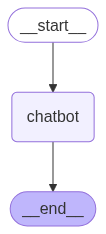

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: q
Goodbye!


# Solving Memory Problem

The chatbot can now use tools to answer user questions, but it does not remember the context of previous interactions so we are fixing the issue

In [ ]:
!pip install --upgrade langgraph
# Adding module of langgraph to add memeory

In [ ]:
# Adding MemorySaver checkpointer
from langgraph.checkpoint.memory import InMemorySaver

memory = InMemorySaver()


In [ ]:
graph = graph_builder.compile(checkpointer=memory)
# Compile the graph

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}, {"configurable": {"thread_id": "1"}}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break



# NOTE : Here we are just adding {"configurable": {"thread_id": "1"}} this msg at send line of the end with a comma it solves the memeory problem :)



User: who is the pm of india
Assistant: As of now, the Prime Minister of India is Narendra Damodardas Modi. He has been serving as the Prime Minister of India since May 26, 2014.
User: tell me more about him
Assistant: Narendra Modi is an Indian politician who has been serving as the 14th and current Prime Minister of India since 2014. Here are some key facts about him:

**Early Life:**

* Born on September 17, 1950, in Vadnagar, Gujarat, India
* His father, Damodardas Mulchand Modi, was a tea seller
* Modi's early life was marked by poverty and hardship, which he has often spoken about in his speeches

**Political Career:**

* Modi joined the Rashtriya Swayamsevak Sangh (RSS), a Hindu nationalist organization, at a young age
* He became the General Secretary of the Bharatiya Janata Party (BJP) in 1988
* Modi was the Chief Minister of Gujarat from 2001 to 2014, serving for three consecutive terms
* He became the Prime Minister of India in 2014, defeating the Indian National Congress (I

# Another method to save the memory by creating varibles :)

In [ ]:
config = {"configurable": {"thread_id": "1"}}

# here we are creating new config varible and storing and running out chat bot
# another method which has given in the DOC
# BUT for our usage we congiured the msg in the stream_graph_updates funcn it self :)

In [ ]:
user_input = "Hi there! My name is Will."

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there! My name is Will.
================================== Ai Message ==================================

Nice to meet you again, Will! It's great to chat with you again. How's your day going so far?


In [ ]:
user_input = "Remember my name?"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [{"role": "user", "content": user_input}]},
    config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Remember my name?
================================== Ai Message ==================================

I remember you mentioning your name was Will earlier! I'm glad I could recall it correctly.


In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}, {"configurable": {"thread_id": "1"}}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break


User: tell me about deepseek model which is launched in 2025
Assistant: I apologize, but I think there might be some confusion. As a conversational AI, I don't have access to future information or events that have not yet occurred. The year 2025 has not yet arrived, and therefore, I am not aware of any information about a "DeepSeek model" that has been launched in that year.

However, I can suggest some possible ways to find more information about the DeepSeek model:

1. Check online news articles and publications: You can search for news articles and publications from reputable sources to see if they have any information about the DeepSeek model.
2. Search academic databases: You can search academic databases such as Google Scholar, ResearchGate, or Academia.edu to see if any researchers or scientists have published papers or articles about the DeepSeek model.
3. Contact the relevant organizations: If you know which organization or company is responsible for developing the DeepSeek mo

# Solving the problem to get the latest info which our model is unable to GIVE :(

Slon : Adding Web Search Tool (Tavily Search Engine)

go to app.tavily.com and creat new  API KEY and it to the colab

In [ ]:
# setting our env variables (we have xle varibales based on our need we use them)

os.environ["TAVILY_API_KEY"] = userdata.get('tavilyKey')

In [ ]:
# Define the tool
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]

tool.invoke("tell me about deepseek llm launched in jan 2025")


# NOTE : Solved the issue it's giving us the latest news about the ans with the ulr link :)

[{'title': 'DeepSeek R1: All you need to know - Fireworks AI',
  'url': 'https://fireworks.ai/blog/deepseek-r1-deepdive',
  'content': 'LLM research space is undergoing rapid evolution, with each new model pushing the boundaries of what machines can accomplish. DeepSeek R1, released on January 20, 2025, by DeepSeek, represents a significant leap in the realm of open-source reasoning models. With capabilities rivaling top proprietary solutions, DeepSeek R1 aims to make advanced reasoning, problem-solving, and real-time decision-making more accessible to researchers and developers across the globe.',
  'score': 0.8729662},
 {'title': 'DeepSeek - Wikipedia',
  'url': 'https://en.wikipedia.org/wiki/DeepSeek',
  'content': 'On 20 January 2025, DeepSeek launched the DeepSeek chatbot "DeepSeek (chatbot)")—based on the DeepSeek-R1 model—free for iOS and Android "Android (operating system)"). By 27 January, DeepSeek surpassed ChatGPT as the most downloaded freeware app on the iOS App Store "App

# Intigrating Tavily to our CHAT BOT

In [ ]:
# By using a TOOL NODE  we are intigrating it in Langgraph

# Note : this is a pre-built toolnode, tools_condition and we have the creted tool node form the scratch in the DOC
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults # changed this 1st line form the actual DOC
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition # pre-built one

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)

def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_edge(START, "chatbot")
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("chatbot", END) # Added this edge here to try and influence the layout
graph = graph_builder.compile(checkpointer=memory)

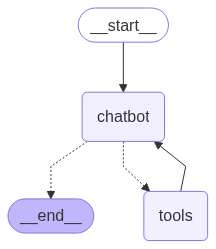

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}, {"configurable": {"thread_id": "4"}}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break


User: tell me about deepseek llm launched in jan 2025
Assistant: 
Assistant: [{"title": "DeepSeek - Wikipedia", "url": "https://en.wikipedia.org/wiki/DeepSeek", "content": "On 20 January 2025, DeepSeek launched the DeepSeek chatbot \"DeepSeek (chatbot)\")—based on the DeepSeek-R1 model—free for iOS and Android \"Android (operating system)\"). By 27 January, DeepSeek surpassed ChatGPT as the most downloaded freeware app on the iOS App Store \"App Store (iOS)\") in the United States,( triggering an 18% drop in Nvidia's share price.(\n\nOn 24 March 2025, DeepSeek released DeepSeek-V3-0324 under the MIT License.( [...] DeepSeek-V2 was released in May 2024, followed a month later by the DeepSeek-Coder V2 series.( In September 2024, DeepSeek V2.5 was introduced and revised in December.( On 20 November 2024, the preview of DeepSeek-R1-Lite became available via API and chat.( In December, DeepSeek-V3-Base and DeepSeek-V3 (chat) were released.(\n\nImage 5\n\nThe DeepSeek login page following a 